In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import to_datetime

In [3]:
data1=pd.read_csv('datastore1.csv',encoding="gb2312")
data2=pd.read_csv('datastore2.csv',encoding="gb2312")

In [4]:
data1.columns=['SDATE','STORE_CODE','POSID','BASK_CODE','BASK_SPEND']
data2.columns=['SDATE','STORE_CODE','POSID','BASK_CODE','PROD_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_TYPE','DISCOUNT_AMOUNT']

In [51]:
data1.tail()

,SDATE,STORE_CODE,POSID,BASK_CODE,BASK_SPEND
571547,2018/7/5,A010,2,284211,34.71
571548,2018/7/5,A010,2,284601,44.80
571549,2018/7/5,A010,2,284241,6.50
571550,2018/7/5,A010,2,284352,15.90
571551,2018/7/5,A010,2,284265,43.20


In [52]:
data2.tail()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
1732756,2018-07-05,A010,2,284254,144474,0.47,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.00,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.00,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.00,2.50,3.0,m,-0.5
1732760,2018-07-05,A010,2,284263,205100,1.00,6.80,6.8,n,0.0


In [53]:
#判断有无缺失值
data1.isnull().sum(axis=0)

SDATE         0
STORE_CODE    0
POSID         0
BASK_CODE     0
BASK_SPEND    0
dtype: int64

In [54]:
data2.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [55]:
data1.duplicated().sum()

0

In [56]:
data2.duplicated().sum()#有重复是因为购买了同一物品购买多次

212724

In [57]:
#共有多少个商店
store_number=data1.drop_duplicates(subset=['STORE_CODE'])
store_number.shape[0]

24

In [58]:
store_number=data2.drop_duplicates(subset=['STORE_CODE'])
store_number.shape[0]
#通过data1和data2的分析得知共有24个store

24

In [59]:
#由下图可以看出从6月1号至7月5号各个店的销售次数情况（不等于销售金额）。

In [60]:
a=data1['STORE_CODE'].value_counts()
STORE_code=list(data1['STORE_CODE'].unique())
x1=np.arange(len(STORE_code))
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [61]:
a

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: STORE_CODE, dtype: int64

In [62]:
type(a)

pandas.core.series.Series

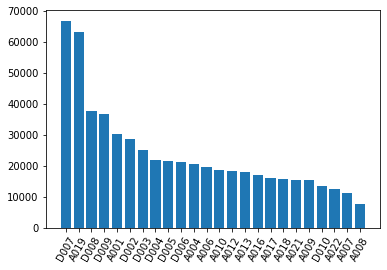

In [63]:
plt.bar(x1, a)
plt.xticks(x1, STORE_code,rotation=60)
plt.show()

In [ ]:
#D007销售次数最多，A008销售次数最少。但不代表金额的多少。

In [64]:
#由下图可以看出所有超市在6月1日至7月5日售出商品种类的多少。

In [5]:
b=data2['PROD_CODE'].value_counts()
PROD_code=list(data2['PROD_CODE'].unique())
x2=np.arange(len(PROD_code))

In [6]:
len(b)

19271

In [7]:
b.head()

205540    12622
21835     10459
194690     9548
72811      7747
178462     7373
Name: PROD_CODE, dtype: int64

In [8]:
#从上述过程可知，所有超市售出共有商品19270种，其中商品205540的销售次数最多。

In [9]:
#极端总消费金额
totalMoney = data1.loc[:,'BASK_SPEND'].sum()

In [10]:
#不重复的获取时间
DAYS= data1.drop_duplicates(subset=['SDATE'])
DAYS

,SDATE,STORE_CODE,POSID,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.00
24,2018/6/2,A001,6,229732,7.50
4386,2018/6/7,A019,1,195762,34.70
4408,2018/6/8,A016,1,82847,18.50
4424,2018/6/5,D003,2,54249,21.00
5892,2018/6/4,D002,2,15636,28.40
5911,2018/6/6,A001,2,127118,68.00
7195,2018/6/3,D002,4,144914,79.30
16000,2018/6/10,A012,2,289007,4.60
16034,2018/6/14,A001,3,31177,64.40


In [11]:
totalI = DAYS.shape[0]
totalI

35

In [12]:
#日售卖金额
days_m=totalMoney//totalI
days_m

636436.0

In [13]:
#每次售卖的平均金额
total_costnumber=data1.shape[0]
day_cost=totalMoney//total_costnumber
day_cost

38.0

In [14]:
from pandas import to_datetime
#时间转化
groupdata1=data1
groupdata1.SDATE=to_datetime(groupdata1.SDATE,format="%Y/%m/%d")
groupdata1

,SDATE,STORE_CODE,POSID,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71
571548,2018-07-05,A010,2,284601,44.80
571549,2018-07-05,A010,2,284241,6.50
571550,2018-07-05,A010,2,284352,15.90


In [15]:
#按时间排序
groupdata1.sort_values(by='SDATE', inplace=True)

In [16]:
#进行数据的分组以及分组后地组内运算
#描述组内数据的基本统计量,只有数字类型的列数据才会计算统计
#按照时间分组
gb = groupdata1.groupby(groupdata1.SDATE)
gb

In [17]:
#对应时间相加
day_data1 = gb.sum()

In [18]:
type(day_data1)

pandas.core.frame.DataFrame

In [78]:
print(day_data1)

            POSID   BASK_CODE  BASK_SPEND
SDATE                                    
2018-06-01  57571  2709149300   717327.28
2018-06-02  56412  2874144244   727910.16
2018-06-03  53899  2703022403   682779.75
2018-06-04  46363  2374427526   557813.05
2018-06-05  51142  2567130788   663394.81
2018-06-06  46109  2452612615   498250.71
2018-06-07  40521  2275945537   436109.19
2018-06-08  45380  2544741536   564402.27
2018-06-09  49189  2746183916   679629.48
2018-06-10  53766  3046474425   702961.56
2018-06-11  42812  2498894752   532263.20
2018-06-12  43866  2616270247   569290.86
2018-06-13  58487  3060922094   722874.45
2018-06-14  49474  2718802716   615684.90
2018-06-15  54972  2946214451   774897.74
2018-06-16  65517  3540218482  1172798.62
2018-06-17  80172  4068534250  1506093.31
2018-06-18  71277  3757906796  1257825.41
2018-06-19  33907  1978851322   412881.99
2018-06-20  46881  2621997273   533702.81
2018-06-21  41546  2401795445   493064.51
2018-06-22  35663  2035798917   41

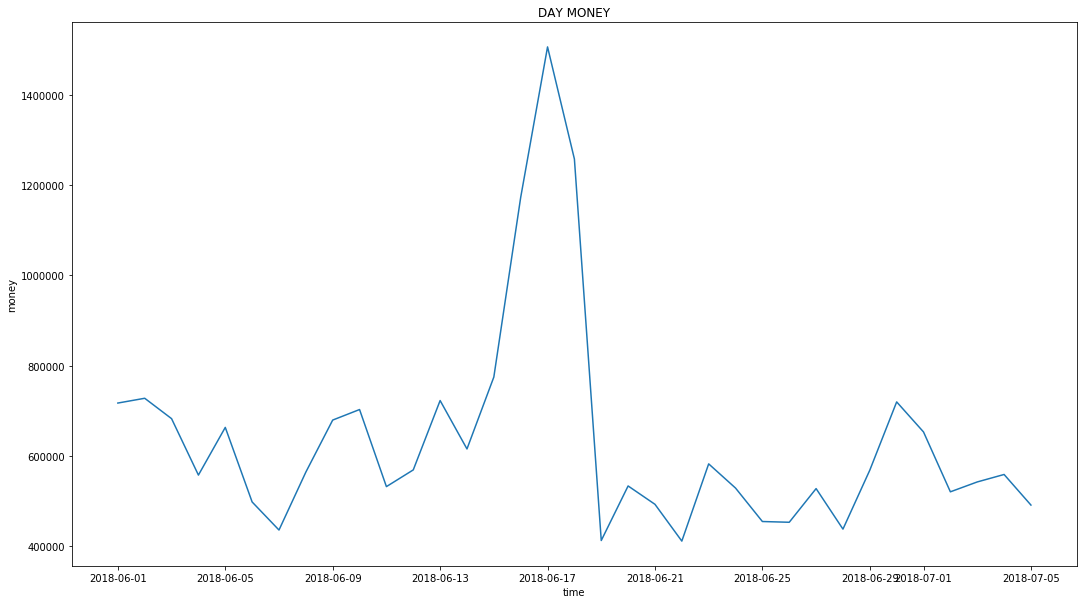

In [80]:
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(day_data1['BASK_SPEND'])
plt.title('DAY MONEY')
plt.xlabel('time')
plt.ylabel('money')
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

In [ ]:
#从上图可以看出每天总金额的变化，在6月17日销售额达到最值，这天是中秋节，金额的巨幅提高可能与此有较大关系。

In [12]:
import pandas as pd
data1['SDATE']=pd.to_datetime(data1['SDATE'],format='%Y.%m.%d')

In [13]:
#分析销售次数最多和销售次数最少的两家商店金额的变化。
date_store = data1.groupby(['STORE_CODE', 'SDATE']).size()

In [14]:
date_D007 = date_store['D007']
date_D007_dict= {'SDATE': date_D007.index,'COUNT': date_D007.values}
date_D007 = pd.DataFrame(date_D007_dict)
date_D007['SDATE'] = date_D007['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
date_D007 = date_D007.set_index('SDATE')

In [15]:
date_A008  = date_store['A008']
date_A008_dict= {'SDATE': date_A008.index,'COUNT': date_A008.values}
date_A008 = pd.DataFrame(date_A008_dict)
date_A008['SDATE'] = date_A008['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
date_A008 = date_A008.set_index('SDATE')

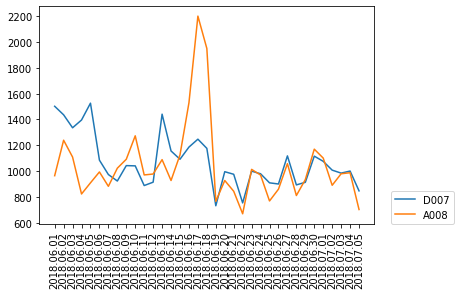

In [16]:
fig1, = plt.plot(date_D007.index, date_D007.values)
plt.xticks(date_D007 .index, rotation=90)
fig2, = plt.plot(date_D007.index, date_A008.values)
plt.legend([fig1, fig2], ['D007', 'A008'], bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

In [ ]:
#从上图可以看出虽然D007的销售次数第一，A008销售次数倒数第一，但是总体销售金额却差不多。